In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Lahore_20140101_20240101.csv')
df

,T2M,RH2M,PRECTOTCORR,WS2M,GWETTOP,GWETROOT,GWETPROF,Date
0,8.41,54.12,0.0,2.13,0.27,0.38,0.38,20140101
1,9.16,32.06,0.0,1.93,0.27,0.38,0.38,20140102
2,10.53,20.56,0.0,1.62,0.27,0.38,0.38,20140103
3,11.78,16.06,0.0,0.95,0.27,0.38,0.38,20140104
4,11.05,20.19,0.0,1.46,0.26,0.38,0.38,20140105
...,...,...,...,...,...,...,...,...
3648,13.03,58.12,0.0,1.34,0.45,0.49,0.48,20231228
3649,13.35,56.56,0.0,0.78,0.45,0.49,0.48,20231229
3650,12.95,55.50,0.0,0.71,0.45,0.49,0.48,20231230
3651,12.85,52.00,0.0,0.45,0.45,0.49,0.48,20231231


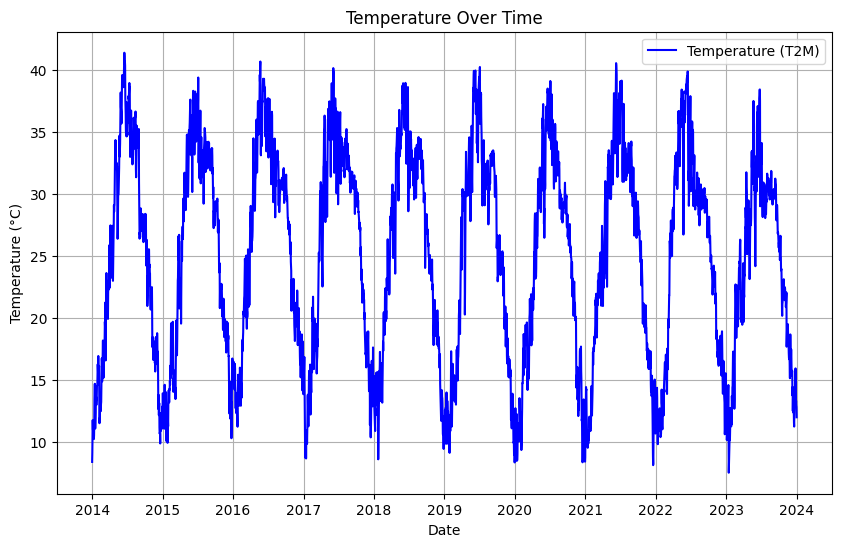

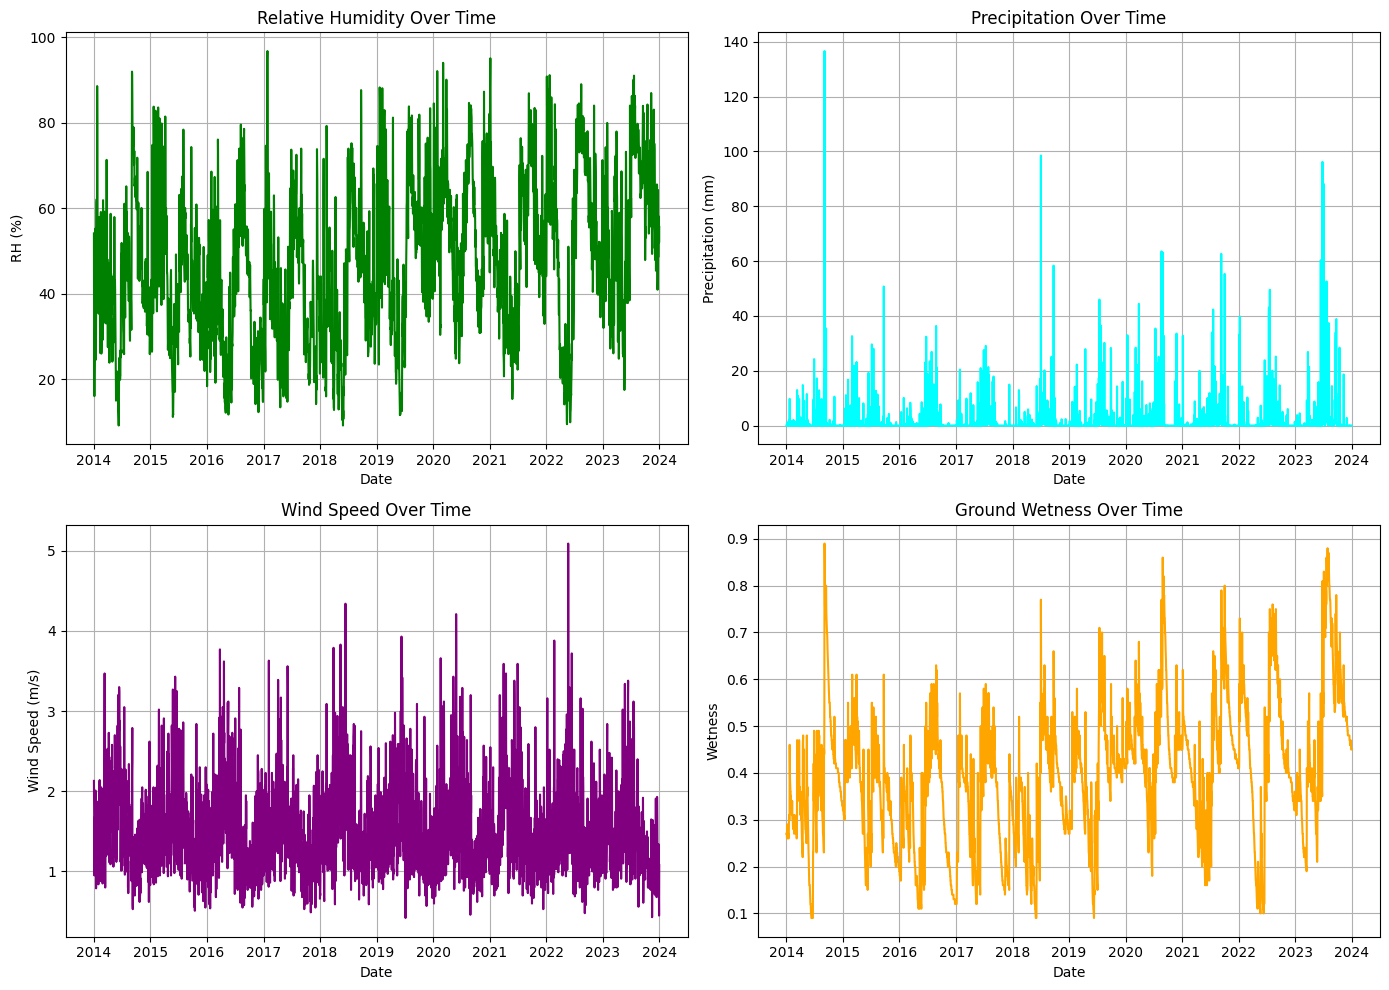

In [15]:
# Exploratory Data Analysis (EDA) plots for the DataFrame

# Plotting Temperature over time
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['Date'], format='%Y%m%d'), df['T2M'], label='Temperature (T2M)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting other parameters
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Relative Humidity (RH2M)
axes[0].plot(pd.to_datetime(df['Date'], format='%Y%m%d'), df['RH2M'], label='Relative Humidity (RH2M)', color='green')
axes[0].set_title('Relative Humidity Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('RH (%)')
axes[0].grid(True)

# Precipitation (PRECTOTCORR)
axes[1].plot(pd.to_datetime(df['Date'], format='%Y%m%d'), df['PRECTOTCORR'], label='Precipitation (PRECTOTCORR)', color='cyan')
axes[1].set_title('Precipitation Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].grid(True)

# Wind Speed (WS2M)
axes[2].plot(pd.to_datetime(df['Date'], format='%Y%m%d'), df['WS2M'], label='Wind Speed (WS2M)', color='purple')
axes[2].set_title('Wind Speed Over Time')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Wind Speed (m/s)')
axes[2].grid(True)

# Ground Wetness (GWETTOP)
axes[3].plot(pd.to_datetime(df['Date'], format='%Y%m%d'), df['GWETTOP'], label='Ground Wetness (GWETTOP)', color='orange')
axes[3].set_title('Ground Wetness Over Time')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Wetness')
axes[3].grid(True)

plt.tight_layout()
plt.show()


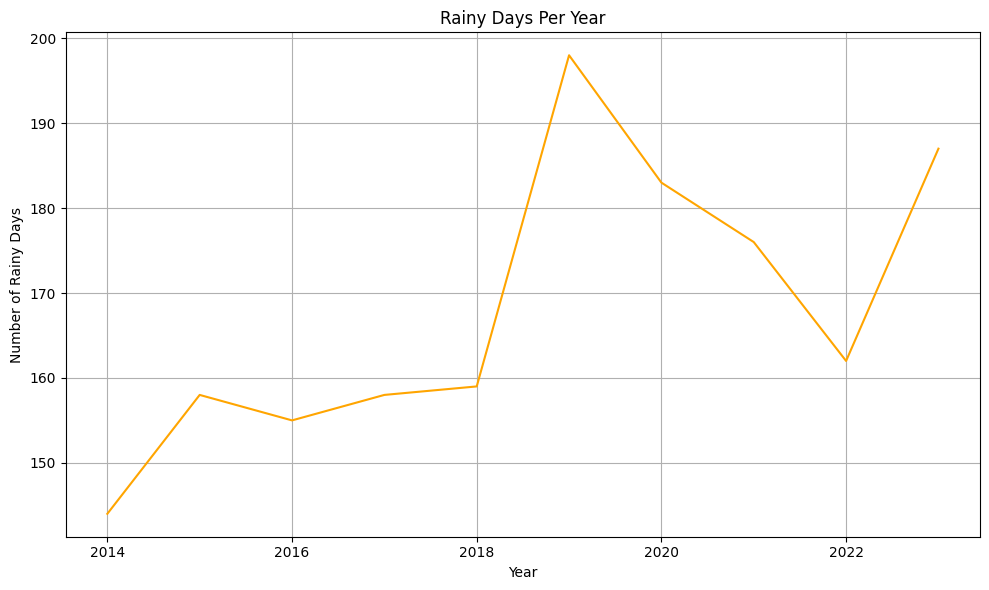

In [17]:
# Analyze rainy days
rainy_days = df[df['PRECTOTCORR'] > 0]

# Plot rainy days per year
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rainy_days.groupby('Year')['Year'].count().index, rainy_days.groupby('Year')['Year'].count().values, label='Rainy Days', color='orange')
ax.set_title('Rainy Days Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Rainy Days')
ax.grid(True)

plt.tight_layout()
plt.show()


In [18]:
# Which days are rainy days over all last years?
rainy_days_overall = rainy_days.groupby('Date').size().sort_values(ascending=False)
print(rainy_days_overall.head(10))

Date
2023-09-22    1
2023-09-21    1
2023-09-20    1
2023-09-19    1
2023-09-18    1
2023-09-17    1
2023-09-16    1
2023-09-15    1
2023-09-14    1
2023-09-13    1
dtype: int64


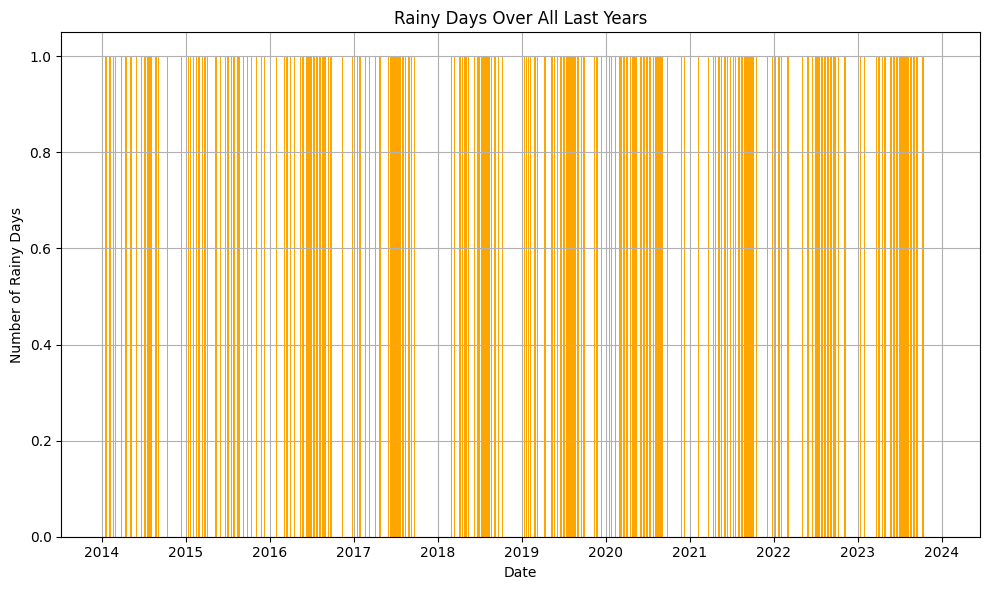

In [19]:
# Plot rainy days "rainy_days_overall"
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(rainy_days_overall.index, rainy_days_overall.values, label='Rainy Days', color='orange')
ax.set_title('Rainy Days Over All Last Years')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rainy Days')
ax.grid(True)

plt.tight_layout()
plt.show()


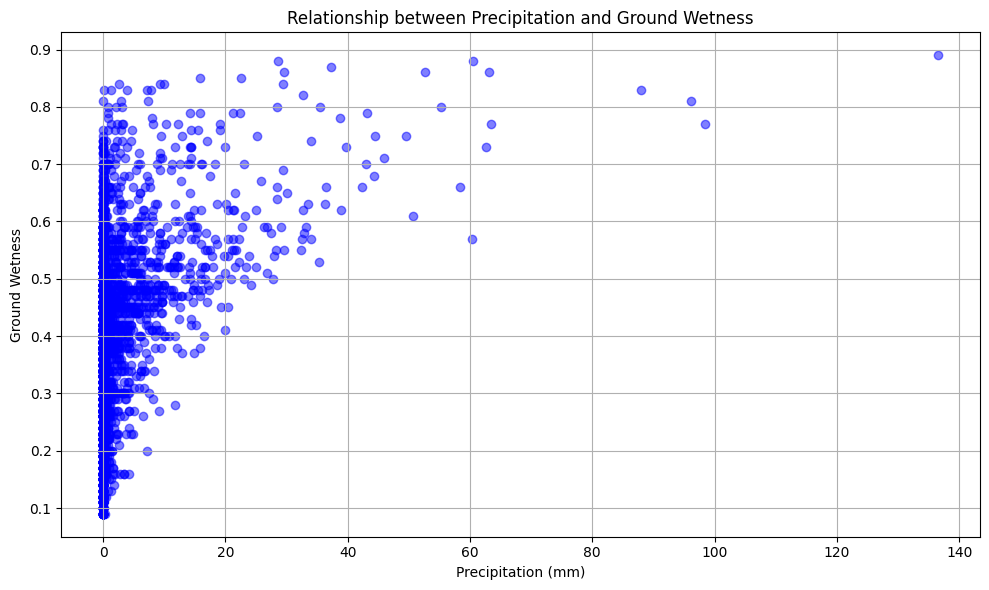

Correlation between Precipitation and Ground Wetness: 0.41


In [20]:
# Analyze the relationship between Precipitation (PRECTOTCORR) and Ground Wetness (GWETTOP)

# Plot scatter plot to visualize relationship
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['PRECTOTCORR'], df['GWETTOP'], color='blue', alpha=0.5)
ax.set_title('Relationship between Precipitation and Ground Wetness')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('Ground Wetness')
ax.grid(True)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['PRECTOTCORR'].corr(df['GWETTOP'])
print(f"Correlation between Precipitation and Ground Wetness: {correlation:.2f}")


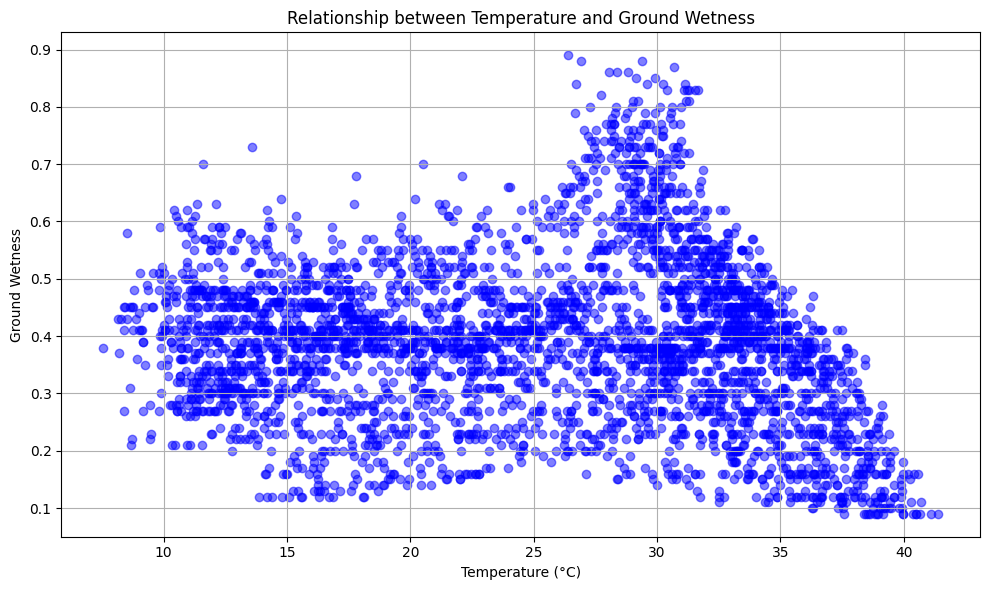

Correlation between Temperature and Ground Wetness: -0.11


In [21]:
# Analyze the relationship between Temperature (T2M) and Ground Wetness (GWETTOP)

# Plot scatter plot to visualize relationship
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['T2M'], df['GWETTOP'], color='blue', alpha=0.5)
ax.set_title('Relationship between Temperature and Ground Wetness')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Ground Wetness')
ax.grid(True)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['T2M'].corr(df['GWETTOP'])
print(f"Correlation between Temperature and Ground Wetness: {correlation:.2f}")